# Data exploration

## Import standard libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import custom scripts

In [3]:
import sys, os
sys.path.append(os.getcwd()+ "/../")
from src.data_preprocessing import DataPreprocessing

# Load 'basic' data features
These are defined as the ones not gotten from textual data (titles nor descriptions) nor from the 'params' original feature

In [4]:
dp = DataPreprocessing(df_path = "../data/real_estate_ads_2022_10.csv",
                        train_indices_path="../data/train_indices.npy", 
                        test_indices_path="../data/test_indices.npy",
                        get_params_from_params=False,
                        get_tfidf_embeddings_flag=False,
                        get_bert_embeddings_flag=False,
                        get_textual_features_flag=False,
                        transform_time_features_flag=True,
                        transform_cyclic_features_flag=True)

In [5]:
dp.X.dtypes

district_lon                      float64
district_lat                      float64
no_rooms                            int64
m                                 float64
map_lon                           float64
map_lat                           float64
market_secondary                    int64
created_at_first_year               int32
created_at_first_month              int32
created_at_first_day                int32
updated_at_year                     int32
updated_at_month                    int32
updated_at_day                      int32
duration_of_update                float64
created_at_first_hour_sin         float64
created_at_first_hour_cos         float64
created_at_first_dayofweek_sin    float64
created_at_first_dayofweek_cos    float64
updated_at_hour_sin               float64
updated_at_hour_cos               float64
updated_at_dayofweek_sin          float64
updated_at_dayofweek_cos          float64
dtype: object

## Get some description on the data

In [6]:
dp.X.describe()

,district_lon,district_lat,no_rooms,m,map_lon,map_lat,market_secondary,created_at_first_year,created_at_first_month,created_at_first_day,...,updated_at_day,duration_of_update,created_at_first_hour_sin,created_at_first_hour_cos,created_at_first_dayofweek_sin,created_at_first_dayofweek_cos,updated_at_hour_sin,updated_at_hour_cos,updated_at_dayofweek_sin,updated_at_dayofweek_cos
count,71735.000000,71735.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,...,73645.000000,7.364500e+04,73645.000000,73645.000000,7.364500e+04,73645.000000,73645.000000,73645.000000,7.364500e+04,73645.000000
mean,16.917100,52.407948,2.468192,57.366612,16.926230,52.407613,0.588132,2020.349447,6.539290,15.870012,...,15.288981,1.658615e+07,-0.305912,-0.365490,1.258145e-01,-0.005778,-0.260634,-0.347858,3.263250e-02,-0.024055
std,0.046276,0.028041,0.972259,983.957998,0.148435,0.046925,0.492175,1.192523,3.344754,8.704803,...,8.964547,2.226307e+07,0.563359,0.674887,6.589981e-01,0.741534,0.590228,0.680225,6.354246e-01,0.771107
min,16.820590,52.233130,1.000000,1.000000,14.541161,50.046410,0.000000,2015.000000,1.000000,1.000000,...,1.000000,3.000000e+00,-0.997669,-0.990686,-8.660254e-01,-1.000000,-0.997669,-0.990686,-8.660254e-01,-1.000000
25%,16.883390,52.383560,2.000000,39.290000,16.898961,52.389114,0.000000,2019.000000,4.000000,8.000000,...,6.000000,2.597952e+06,-0.816970,-0.917211,-2.449294e-16,-0.500000,-0.816970,-0.917211,-8.660254e-01,-0.500000
50%,16.921860,52.395910,2.000000,49.160000,16.929730,52.401094,1.000000,2020.000000,7.000000,16.000000,...,16.000000,6.821518e+06,-0.398401,-0.576680,1.224647e-16,-0.500000,-0.398401,-0.576680,1.224647e-16,-0.500000
75%,16.940800,52.426580,3.000000,63.000000,16.950586,52.426580,1.000000,2021.000000,9.000000,23.000000,...,24.000000,2.074153e+07,0.136167,0.203456,8.660254e-01,0.500000,0.136167,0.203456,8.660254e-01,0.500000
max,21.019000,52.493340,11.000000,267000.000000,48.973250,60.609920,1.000000,2022.000000,12.000000,31.000000,...,31.000000,2.180460e+08,0.997669,1.000000,8.660254e-01,1.000000,0.997669,1.000000,8.660254e-01,1.000000


## Pairplot

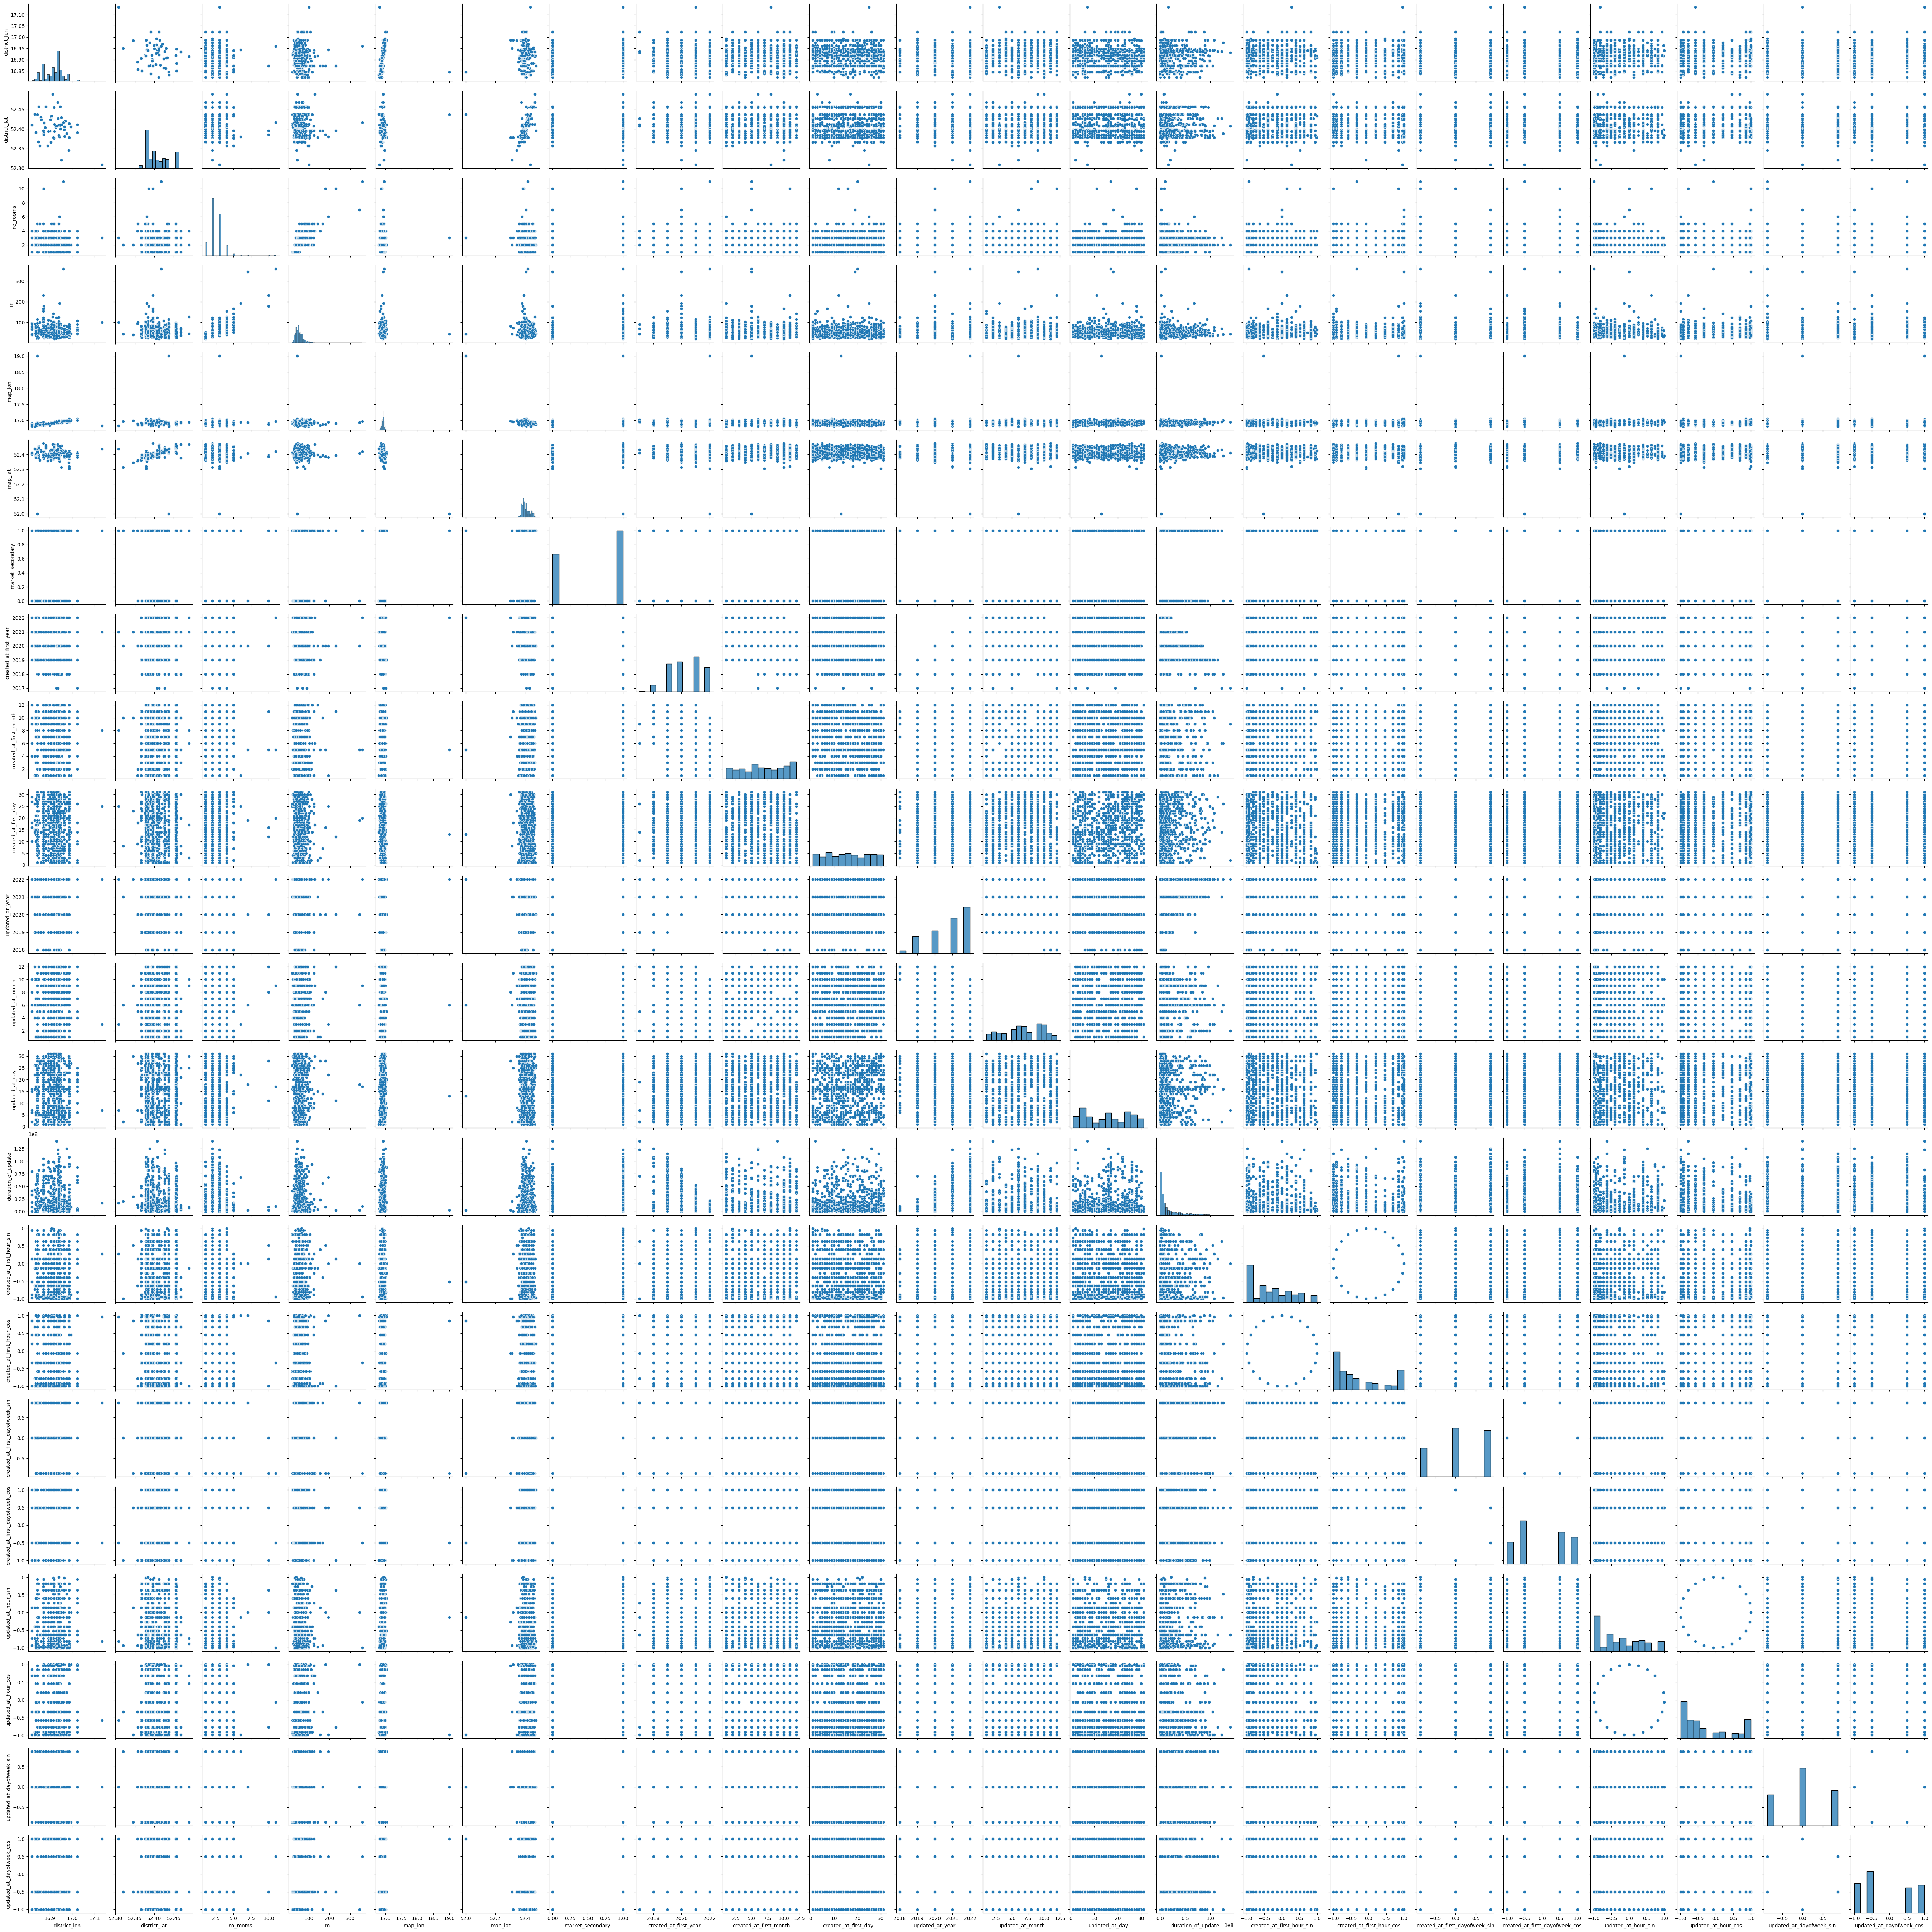

In [8]:
sns.pairplot(dp.X.sample(1000))

We observe that some data is quite skewed.
It is not difficult to do some transformations on that.

However, for time reasons, and for not wanting to 'automize' transformations on features (like automatically identify the best transformation, such as log-transformation, wrt skeweness).<br>
Due to the amount of features (here we only se 'basic' ones), it is not reasonable to do it carefully; therefore we discard this approach.

However, getting rid of outliers seems more reasonable. For that, we created a class outlier_imputer.

In [10]:
import importlib
import src.outlier_imputer
importlib.reload(src.outlier_imputer) # We do this for debugging purposes

from src.outlier_imputer import OutlierImputer

oi = OutlierImputer()